<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DeepLearning/blob/main/%EA%B3%BC%EC%A0%81%ED%95%A9_%EB%B0%8F_%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
NUM_WORDS=1000

In [ ]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS) 

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
def multi_hot_sequences(sequences, dimension):
  results=np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data=multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data, dimension=NUM_WORDS)

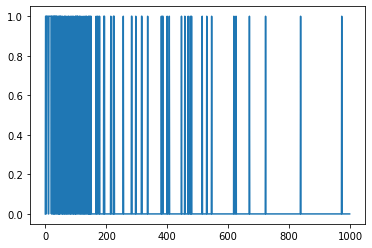

In [ ]:
plt.plot(train_data[0])

In [ ]:
baseline_model=keras.Sequential([
       keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )), 
       keras.layers.Dense(16, activation='relu'), 
       keras.layers.Dense(1, activation='sigmoid')                          
                                 ])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history=baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5774 - accuracy: 0.7033 - binary_crossentropy: 0.5774 - val_loss: 0.4273 - val_accuracy: 0.8197 - val_binary_crossentropy: 0.4273
Epoch 2/20
49/49 - 0s - loss: 0.3657 - accuracy: 0.8475 - binary_crossentropy: 0.3657 - val_loss: 0.3414 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3414
Epoch 3/20
49/49 - 0s - loss: 0.3205 - accuracy: 0.8680 - binary_crossentropy: 0.3205 - val_loss: 0.3324 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3324
Epoch 4/20
49/49 - 0s - loss: 0.3073 - accuracy: 0.8726 - binary_crossentropy: 0.3073 - val_loss: 0.3292 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3292
Epoch 5/20
49/49 - 0s - loss: 0.3049 - accuracy: 0.8742 - binary_crossentropy: 0.3049 - val_loss: 0.3387 - val_accuracy: 0.8554 - val_binary_crossentropy: 0.3387
Epoch 6/20
49/49 - 0s - loss: 0.2996 - accuracy: 0.8768 - binary_crossentropy: 0.2996 - val_loss: 0.3349 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3349
Epoch 7/20
49/49 - 0s - loss

In [ ]:
smaller_model=keras.Sequential([
                                keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS, )),
                                keras.layers.Dense(4, activation='relu'),
                                keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history=smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6756 - accuracy: 0.5606 - binary_crossentropy: 0.6756 - val_loss: 0.6335 - val_accuracy: 0.6238 - val_binary_crossentropy: 0.6335
Epoch 2/20
49/49 - 0s - loss: 0.5882 - accuracy: 0.7042 - binary_crossentropy: 0.5882 - val_loss: 0.5540 - val_accuracy: 0.7508 - val_binary_crossentropy: 0.5540
Epoch 3/20
49/49 - 0s - loss: 0.5259 - accuracy: 0.7984 - binary_crossentropy: 0.5259 - val_loss: 0.5090 - val_accuracy: 0.8088 - val_binary_crossentropy: 0.5090
Epoch 4/20
49/49 - 0s - loss: 0.4863 - accuracy: 0.8377 - binary_crossentropy: 0.4863 - val_loss: 0.4772 - val_accuracy: 0.8395 - val_binary_crossentropy: 0.4772
Epoch 5/20
49/49 - 0s - loss: 0.4558 - accuracy: 0.8554 - binary_crossentropy: 0.4558 - val_loss: 0.4528 - val_accuracy: 0.8474 - val_binary_crossentropy: 0.4528
Epoch 6/20
49/49 - 0s - loss: 0.4301 - accuracy: 0.8670 - binary_crossentropy: 0.4301 - val_loss: 0.4314 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.4314
Epoch 7/20
49/49 - 0s - loss

In [ ]:
bigger_model=keras.models.Sequential([
                                      keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS, )),
                                      keras.layers.Dense(512, activation='relu'),
                                      keras.layers.Dense(1, activation='sigmoid')
])
bigger_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history=bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.4418 - accuracy: 0.7930 - binary_crossentropy: 0.4418 - val_loss: 0.3351 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3351
Epoch 2/20
49/49 - 3s - loss: 0.2945 - accuracy: 0.8765 - binary_crossentropy: 0.2945 - val_loss: 0.3246 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3246
Epoch 3/20
49/49 - 3s - loss: 0.2297 - accuracy: 0.9074 - binary_crossentropy: 0.2297 - val_loss: 0.3338 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3338
Epoch 4/20
49/49 - 3s - loss: 0.1129 - accuracy: 0.9656 - binary_crossentropy: 0.1129 - val_loss: 0.4143 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.4143
Epoch 5/20
49/49 - 3s - loss: 0.0263 - accuracy: 0.9957 - binary_crossentropy: 0.0263 - val_loss: 0.5349 - val_accuracy: 0.8491 - val_binary_crossentropy: 0.5349
Epoch 6/20
49/49 - 3s - loss: 0.0048 - accuracy: 0.9998 - binary_crossentropy: 0.0048 - val_loss: 0.6235 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.6235
Epoch 7/20
49/49 - 3s - loss

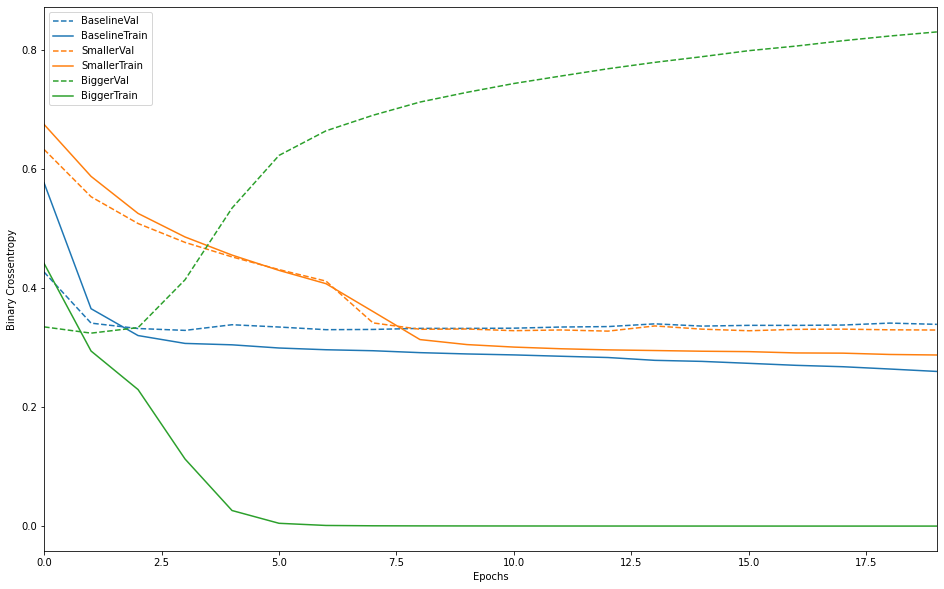

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val=plt.plot(history.epoch, history.history['val_'+key],
                 '--', label=name.title() + 'Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+ 'Train')

  plt.xlabel("Epochs")
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

# 실선: 훈련 손실, 점선: 검증 손실(검증 손실이 낮을수록 좋은 모델)

In [ ]:
# 가중치 규제 중 L2 규제: 가중치의 제곱에 비례하는 비용 추가(가중치 감쇠)
l2_model=keras.models.Sequential([
                                  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                                                     activation='relu', input_shape=(NUM_WORDS, )),
                                  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                     activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model_history=l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

# l2(0.001): 네트워크 전체 손실에 층에 있는 가중치 행렬의 모든 값이 0.001*weight_coefficient_value**2만큼 더해진다 -> 이 패널티는 훈련할 때만 추가 -> 테스트보다 훈련에서 네트워크 손실이 클 것

In [ ]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [ ]:
# 드롭아웃 추가하기
# 드롭아웃을 층에 적용 -> 훈련하는 동안 층의 출력 특성을 랜덤하게 끈다(0으로 만든다)
# 드롭아웃 비율: 0이 되는 특성의 비율(보통 0.2~0.5)
# 테스트 단계: 어떤 유닛도 드롭아웃하지 X -> 훈련 단계에서 더 많은 유닛이 활성화되기 때문 -> 균형 맞추기 위해 층의 출력 값을 드롭아웃 비율만큼 줄이기


In [ ]:
dpt_model=keras.models.Sequential([
                                   keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )), 
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(16, activation='relu'),
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history=dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)


Epoch 1/20
49/49 - 1s - loss: 0.6790 - accuracy: 0.5665 - binary_crossentropy: 0.6790 - val_loss: 0.6091 - val_accuracy: 0.7335 - val_binary_crossentropy: 0.6091
Epoch 2/20
49/49 - 0s - loss: 0.5825 - accuracy: 0.6934 - binary_crossentropy: 0.5825 - val_loss: 0.4684 - val_accuracy: 0.8166 - val_binary_crossentropy: 0.4684
Epoch 3/20
49/49 - 0s - loss: 0.4931 - accuracy: 0.7736 - binary_crossentropy: 0.4931 - val_loss: 0.3876 - val_accuracy: 0.8438 - val_binary_crossentropy: 0.3876
Epoch 4/20
49/49 - 0s - loss: 0.4377 - accuracy: 0.8139 - binary_crossentropy: 0.4377 - val_loss: 0.3532 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3532
Epoch 5/20
49/49 - 0s - loss: 0.3981 - accuracy: 0.8365 - binary_crossentropy: 0.3981 - val_loss: 0.3327 - val_accuracy: 0.8567 - val_binary_crossentropy: 0.3327
Epoch 6/20
49/49 - 0s - loss: 0.3789 - accuracy: 0.8482 - binary_crossentropy: 0.3789 - val_loss: 0.3287 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3287
Epoch 7/20
49/49 - 0s - loss

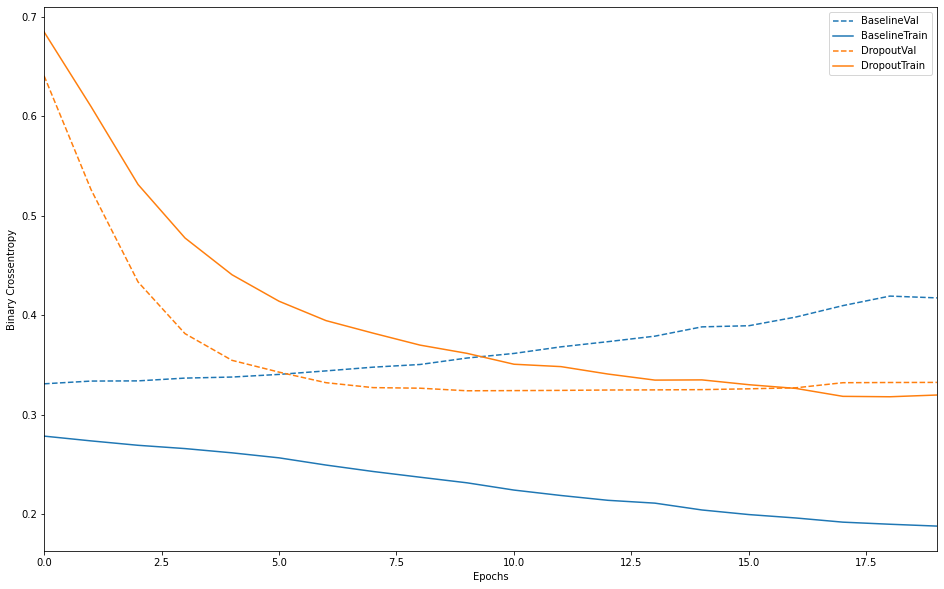

In [ ]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)])